## https://github.com/krishnaik06/Feature-Engineering-Live-sessions

## https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20MeanMedianDay%201.ipynb

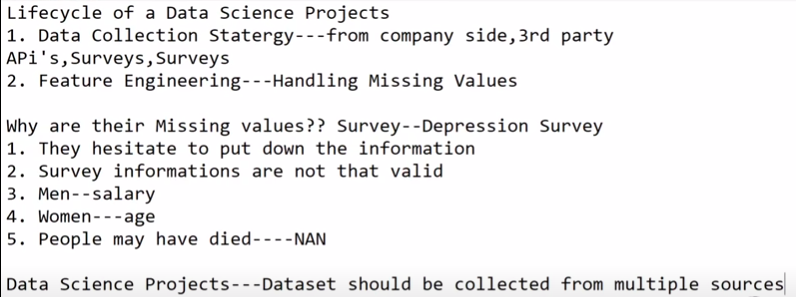
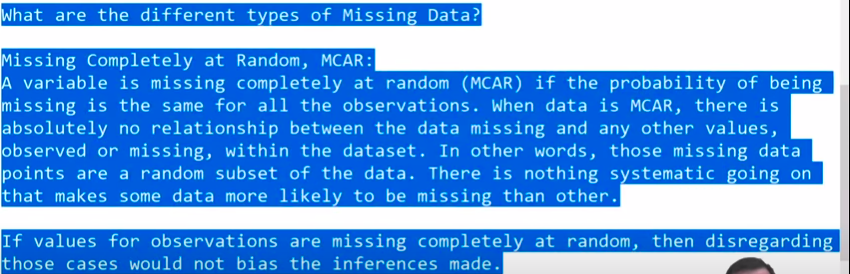

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('titanic.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

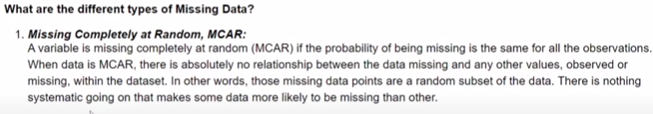

In [4]:
# MCAR - There is no relationship between Age, Cabin Embarked
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

### 2. Missing data Not At Random(MNAR): Systematic missing values

There is absolutely some relationship between data missing and any other values, observed or missing within the dataset

In [7]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

#Find percentage of null values
df['cabin_null'].mean() # 77% of NaN values are available

0.7710437710437711

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [9]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  cabin_null  
0      0         A/5 21171   7.2500   NaN        S           1  
1      0          PC 17599  71.2833   C85        C           0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S           0  
4      0            373450   8.0500   NaN        S           1

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [13]:
df.groupby('Survived')['cabin_null'].mean()
#0  0.876138 --> 87% are non survived with missing cabin information
#1  0.602339 --> 60% are survived with missing cabin information

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random(MAR)

Men ---> Hide their salary

Women ---> Hide their Age

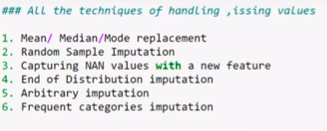

### Mean/Median/Mode Replacement

When should we need to apply?

Mean/Median/Mode Imputation has an assumption that the data are Missing Completely At Random(MCAR).

We solve this by replacing NAN with most frequent occurences of the variables

In [59]:
df1=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df1.head()

Survived   Age     Fare
0         0  22.0   7.2500
1         1  38.0  71.2833
2         1  26.0   7.9250
3         1  35.0  53.1000
4         0  35.0   8.0500

In [60]:
# Lets see % of missing value
df1.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [61]:
missing_age_columns = df1[df1['Age'].isnull()].index
missing_age_columns

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

## Enum in Python

In [62]:
from enum import Enum 
# creating enumerations using class
class filling_missing(Enum):
    mean = 1
    median = 2
    mode = 3

# printing enum member as string
print ("The string representation of enum member is : ",end="")
print (filling_missing.mean)
  
# printing enum member as repr
print ("The repr representation of enum member is : ",end="")
print (repr(filling_missing.mean))
  
# printing the type of enum member using type()
print ("The type of enum member is : ",end ="")
print (type(filling_missing.mean))
  
# printing name of enum member using "name" keyword
print ("The name of enum member is : ",end ="")
print (filling_missing.mean.name)

# printing name of enum member using "name" keyword
print ("The name of enum member is : ",end ="")
print (filling_missing.mean.value, type(filling_missing.mean.value))

The string representation of enum member is : filling_missing.mean
The repr representation of enum member is : <filling_missing.mean: 1>
The type of enum member is : <enum 'filling_missing'>
The name of enum member is : mean
The name of enum member is : 1 <class 'int'>


In [63]:
def impute_nan(df,variable,filling_missing):
    replacena = 0
    print('filling_missing : ', filling_missing)
    if(filling_missing.value == 1):
        replacena = df[variable].mean()
    elif(filling_missing.value == 2):
        replacena = df[variable].median()
    else:
        replacena = df[variable].mode()
    print('replacena : ', replacena)
    df[variable+'_'+filling_missing.name] = df[variable].fillna(replacena)

In [64]:
impute_nan(df1,'Age',filling_missing.median)
df1.iloc[missing_age_columns]

filling_missing :  filling_missing.median
replacena :  28.0


Survived  Age     Fare  Age_median
5           0  NaN   8.4583        28.0
17          1  NaN  13.0000        28.0
19          1  NaN   7.2250        28.0
26          0  NaN   7.2250        28.0
28          1  NaN   7.8792        28.0
..        ...  ...      ...         ...
859         0  NaN   7.2292        28.0
863         0  NaN  69.5500        28.0
868         0  NaN   9.5000        28.0
878         0  NaN   7.8958        28.0
888         0  NaN  23.4500        28.0

[177 rows x 4 columns]

In [65]:
impute_nan(df1,'Age',filling_missing.mean)
df1.iloc[missing_age_columns]

filling_missing :  filling_missing.mean
replacena :  29.69911764705882


Survived  Age     Fare  Age_median   Age_mean
5           0  NaN   8.4583        28.0  29.699118
17          1  NaN  13.0000        28.0  29.699118
19          1  NaN   7.2250        28.0  29.699118
26          0  NaN   7.2250        28.0  29.699118
28          1  NaN   7.8792        28.0  29.699118
..        ...  ...      ...         ...        ...
859         0  NaN   7.2292        28.0  29.699118
863         0  NaN  69.5500        28.0  29.699118
868         0  NaN   9.5000        28.0  29.699118
878         0  NaN   7.8958        28.0  29.699118
888         0  NaN  23.4500        28.0  29.699118

[177 rows x 5 columns]

In [66]:
impute_nan(df1,'Age',filling_missing.mode)
df1.iloc[missing_age_columns]

filling_missing :  filling_missing.mode
replacena :  0    24.0
dtype: float64


Survived  Age     Fare  Age_median   Age_mean  Age_mode
5           0  NaN   8.4583        28.0  29.699118       NaN
17          1  NaN  13.0000        28.0  29.699118       NaN
19          1  NaN   7.2250        28.0  29.699118       NaN
26          0  NaN   7.2250        28.0  29.699118       NaN
28          1  NaN   7.8792        28.0  29.699118       NaN
..        ...  ...      ...         ...        ...       ...
859         0  NaN   7.2292        28.0  29.699118       NaN
863         0  NaN  69.5500        28.0  29.699118       NaN
868         0  NaN   9.5000        28.0  29.699118       NaN
878         0  NaN   7.8958        28.0  29.699118       NaN
888         0  NaN  23.4500        28.0  29.699118       NaN

[177 rows x 6 columns]

In [75]:
df1['Age'].mean()

29.69911764705882

In [76]:
df1['Age'].median()

28.0

In [77]:
df1['Age'].mode()

0    24.0
dtype: float64

In [78]:
df1['Age'].std()

14.526497332334044

In [79]:
df1['Age_median'].std()

13.019696550973194

In [80]:
import seaborn as sns

/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/vinoth/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/vinoth/a

<AxesSubplot:ylabel='Density'>

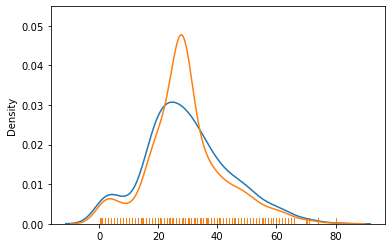

In [91]:
sns.distplot(df1[['Age']], hist=False, rug=True)
sns.distplot(df1[['Age_median']], hist=False, rug=True)


### Advantages And Disadvantages of Mean/Median Imputation
### Advantages
1.Easy to implement(Robust to outliers)

2.Faster way to obtain the complete dataset

#### Disadvantages
1.Change or Distortion in the original variance

2.Impacts Correlation